In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from  pmdarima import auto_arima
from pmdarima.model_selection import train_test_split
#from chart_studio.plotly import instead

Analise dos dados

In [59]:
base = pd.read_csv('../../dataset/AirPassengers.csv')

In [60]:
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [61]:
#data = lambda dates: pd.datetime.strptime(dates,'%Y-%m') # funçao para transformar em data 

In [62]:
#base = pd.read_csv('../../dataset/AirPassengers.csv', parse_dates=['Month'],
                  index_col='Month', date_parser=data)

/home/luzian/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [111]:
base.index = pd.to_datetime(base.index)
type(base.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [107]:
ts = base['#Passengers']

In [108]:
type(ts)

pandas.core.series.Series

In [109]:
ts.index.min()

Timestamp('1949-01-01 00:00:00')

In [110]:
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [68]:
ts['1949':'1950']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
1950-01-01    115
1950-02-01    126
1950-03-01    141
1950-04-01    135
1950-05-01    125
1950-06-01    149
1950-07-01    170
1950-08-01    170
1950-09-01    158
1950-10-01    133
1950-11-01    114
1950-12-01    140
Name: #Passengers, dtype: int64

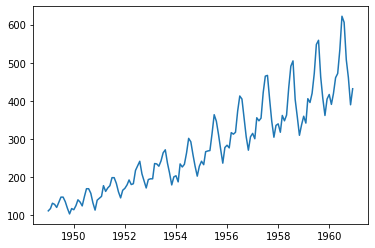

In [69]:
plt.plot(ts)

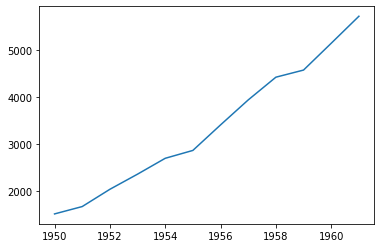

In [70]:
ts_ano = ts.resample('A').sum()
plt.plot(ts_ano)

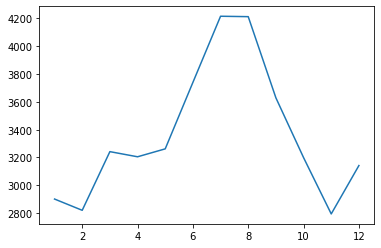

In [71]:
ts_mes = ts.groupby([lambda x: x.month]).sum()
plt.plot(ts_mes)

Decomposição dos dados

In [72]:
decom = seasonal_decompose(ts)

In [73]:
tendencia = decom.trend
sazonal = decom.seasonal
aleatorio = decom.resid

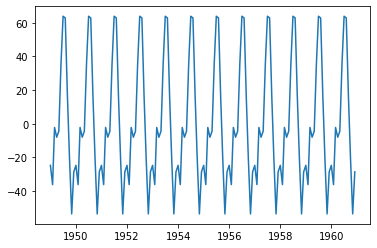

In [74]:
plt.plot(sazonal)

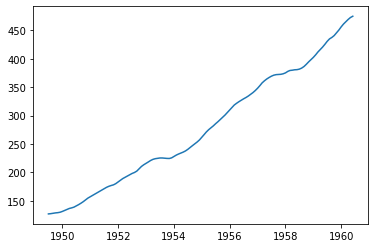

In [75]:
plt.plot(tendencia)

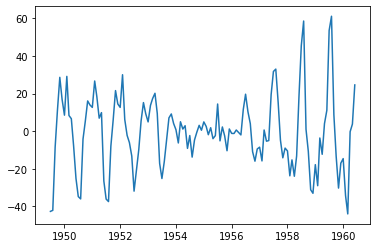

In [76]:
plt.plot(aleatorio)

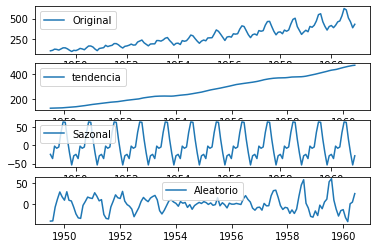

In [77]:
#grafico decomposição 1
plt.subplot(4,1,1)
plt.plot(ts, label='Original')
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label='tendencia')
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal, label='Sazonal')
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label='Aleatorio')
plt.legend(loc = 'best')

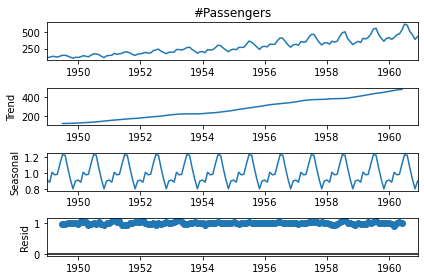

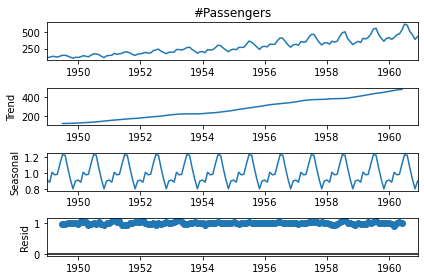

In [78]:
#grafico decomposição 2
seasonal_decompose(ts, model='multiplicative').plot()

Precisão com media movel

In [80]:
#media_movel = pd.rolling_mean(ts,12) #é para funcionar na ultima versao do pandas

In [163]:
len(ts)

144

In [164]:
train = ts[:100]
len(train)
train.head()

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64

In [165]:
test = ts[100:144] 
per_test = test.index
per_test

DatetimeIndex(['1957-05-01', '1957-06-01', '1957-07-01', '1957-08-01',
               '1957-09-01', '1957-10-01', '1957-11-01', '1957-12-01',
               '1958-01-01', '1958-02-01', '1958-03-01', '1958-04-01',
               '1958-05-01', '1958-06-01', '1958-07-01', '1958-08-01',
               '1958-09-01', '1958-10-01', '1958-11-01', '1958-12-01',
               '1959-01-01', '1959-02-01', '1959-03-01', '1959-04-01',
               '1959-05-01', '1959-06-01', '1959-07-01', '1959-08-01',
               '1959-09-01', '1959-10-01', '1959-11-01', '1959-12-01',
               '1960-01-01', '1960-02-01', '1960-03-01', '1960-04-01',
               '1960-05-01', '1960-06-01', '1960-07-01', '1960-08-01',
               '1960-09-01', '1960-10-01', '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', freq=None)

In [166]:
valores_test = test.values
valores_test

array([355, 422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348, 363,
       435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472,
       548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622,
       606, 508, 461, 390, 432])

In [167]:
media_movel=train.rolling(window=12).mean() 
len(media_movel)

100

In [168]:
media_movel.head(15) # faz a media com base nos 11 meses anterior e o proprio, por isso so tem a partir do 1994-12

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01           NaN
1949-08-01           NaN
1949-09-01           NaN
1949-10-01           NaN
1949-11-01           NaN
1949-12-01    126.666667
1950-01-01    126.916667
1950-02-01    127.583333
1950-03-01    128.333333
Name: #Passengers, dtype: float64

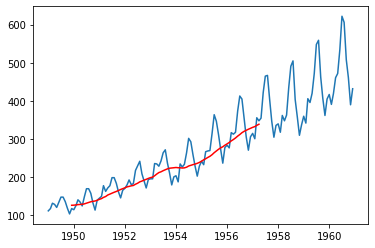

In [169]:
plt.plot(ts)
plt.plot(media_movel, color = 'red')

Previsão com o Arima

In [186]:
# verificar quais os melhores valores com o auto arima para depois usar o arima
modelo = ARIMA(train, order=(3,1,3)) # (num dos termos regressivos, media movel, sazonal)
modelo_treinado = modelo.fit()

/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


In [187]:
previsoes = modelo_treinado.forecast(steps=12)

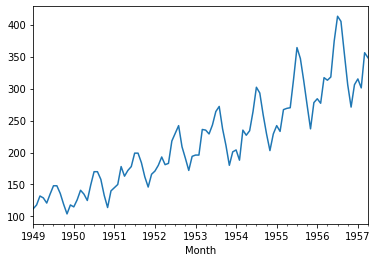

In [188]:
eixo = train.plot() # dados do database

In [189]:
valores_test

array([355, 422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348, 363,
       435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472,
       548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622,
       606, 508, 461, 390, 432])

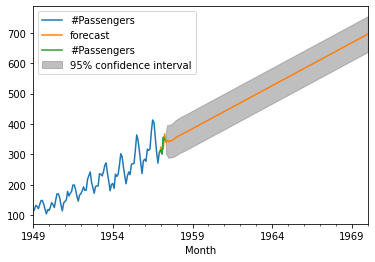

In [190]:
modelo_treinado.plot_predict('1957','1970', ax = eixo, plot_insample = True )

# Usando o auto_arima para automatizar o processo  para saber qual valores usar na order do arima

In [192]:
modelo_auto = auto_arima(train, m=12, seasonal = True, trace= True) # fit

Performing stepwise search to minimize aic


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(2,1,2)x(1,1,1,12) [intercept=True]; AIC=646.567, BIC=666.294, Time=1.585 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=652.680, BIC=657.612, Time=0.017 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=645.940, BIC=655.803, Time=0.276 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=646.447, BIC=656.311, Time=0.300 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=650.796, BIC=653.262, Time=0.020 seconds
Fit ARIMA(1,1,0)x(0,1,0,12) [intercept=True]; AIC=647.792, BIC=655.190, Time=0.094 seconds
Fit ARIMA(1,1,0)x(2,1,0,12) [intercept=True]; AIC=647.914, BIC=660.244, Time=0.846 seconds
Fit ARIMA(1,1,0)x(1,1,1,12) [intercept=True]; AIC=647.927, BIC=660.257, Time=0.417 seconds
Fit ARIMA(1,1,0)x(0,1,1,12) [intercept=True]; AIC=646.338, BIC=656.201, Time=0.218 seconds


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Fit ARIMA(1,1,0)x(2,1,1,12) [intercept=True]; AIC=646.269, BIC=661.065, Time=3.018 seconds
Near non-invertible roots for order (1, 1, 0)(2, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.998)
Fit ARIMA(0,1,0)x(1,1,0,12) [intercept=True]; AIC=649.280, BIC=656.678, Time=0.180 seconds
Fit ARIMA(2,1,0)x(1,1,0,12) [intercept=True]; AIC=647.833, BIC=660.163, Time=0.412 seconds
Fit ARIMA(1,1,1)x(1,1,0,12) [intercept=True]; AIC=647.405, BIC=659.734, Time=0.497 seconds
Fit ARIMA(0,1,1)x(1,1,0,12) [intercept=True]; AIC=646.058, BIC=655.921, Time=0.216 seconds


/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/luzian/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Fit ARIMA(2,1,1)x(1,1,0,12) [intercept=True]; AIC=649.330, BIC=664.126, Time=0.655 seconds
Total fit time: 8.802 seconds


In [193]:
modelo_auto.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  100
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -318.970
Date:                            Sun, 12 Jul 2020   AIC                            645.940
Time:                                    15:09:00   BIC                            655.803
Sample:                                         0   HQIC                           649.912
                                            - 100                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5341      1.082      0.493      0.622      -1.587       2.656
ar.L1         -0.2456      0.097     -2.534      0.011      -0.436      -0.056
ar.S.L12      -0.2141      0.088     -2.432      0.015      -0.387      -0.042
sigma2        88.9070     15.058      5.904      0.000      59.394     118.420
===================================================================================
Ljung-Box (Q):                       39.29   Jarque-Bera (JB):                 2.40
Prob(Q):                              0.50   Prob(JB):                         0.30
Heteroskedasticity (H):               1.34   Skew:                             0.40
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.81
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [195]:
previsoes_auto = modelo_auto.predict(n_periods=44)
previsoes_auto

array([353.97561543, 407.70415394, 449.35902561, 439.83975177,
       393.48577214, 347.26886496, 312.26968384, 348.98324915,
       357.76963718, 345.6974149 , 397.91409006, 391.19944821,
       397.39493746, 452.03868293, 493.55383028, 484.78868897,
       438.08273916, 391.69865021, 357.12808703, 393.90350055,
       403.16442502, 391.10817924, 444.34967245, 437.78857565,
       444.36577413, 499.24232931, 541.21619069, 532.71835177,
       486.5165666 , 440.59707146, 406.36351678, 443.55447934,
       453.14257927, 441.51170555, 494.9625362 , 488.79735236,
       495.72160443, 550.97709874, 593.2815238 , 585.1552377 ,
       539.27428336, 493.6840928 , 459.80716398, 497.33793364])

In [196]:
valores_test

array([355, 422, 465, 467, 404, 347, 305, 336, 340, 318, 362, 348, 363,
       435, 491, 505, 404, 359, 310, 337, 360, 342, 406, 396, 420, 472,
       548, 559, 463, 407, 362, 405, 417, 391, 419, 461, 472, 535, 622,
       606, 508, 461, 390, 432])